In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torchvision import transforms

from main import LicensePlateModel, detect_plate, segment_characters

# Load the model and optimizer state
checkpoint = torch.load("license_plate_model.pt")
model = LicensePlateModel()
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

# Transform to apply to each character image
transform = transforms.Compose(
    [
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

# Map class indices to characters
class_names = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"


def detect_and_segment(image_path):
    img = cv2.imread(image_path)
    output_img, plate = detect_plate(img)
    char_images = segment_characters(plate)
    return char_images


def classify_characters(char_images, model):
    characters = []
    with torch.no_grad():
        for char_img in char_images:
            char_img = np.stack([char_img] * 3, axis=2)  # Convert to 3-channel image
            char_img = Image.fromarray(
                char_img.astype(np.uint8)
            )  # Convert to PIL Image
            char_img = transform(char_img).unsqueeze(
                0
            )  # Apply transforms and add batch dimension
            output = model(char_img)
            pred = torch.argmax(output, dim=1).item()
            characters.append(class_names[pred])
    return "".join(characters)


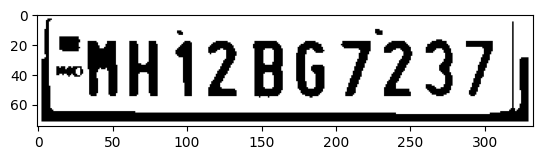

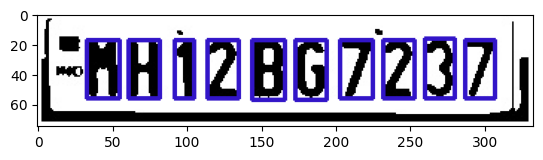

Recognized license plate: 5H12BG7237


In [18]:
# Load and process the image
char_images = detect_and_segment("archive/images/Cars12.png")

# Classify the characters
license_plate = classify_characters(char_images, model)

print(f"Recognized license plate: {license_plate}")
